# <center>  Which Employees Are Most Likely To Leave The Company? </center>

<img src="https://images.unsplash.com/photo-1507679799987-c73779587ccf?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1351&q=80" width=600 style="height:400px" />

<center><span>Photo by <a href="https://unsplash.com/@huntersrace?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Hunters Race</a> on <a href="https://unsplash.com/?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></center>

## 1. Project Definition

Today, the employees turnover is one of the biggest challenges. With a very competitive job market, organizations are doing their best to retain talents. I have obtained the dataset prepared by IBM which collected information about human resources within a company. Based on this, I have created the **Machine Learning Alghorythm** that is predicting if the employee is going to leave the organization. 

Questions that this project will answer are:

* Which **employees** are most likely to leave the organization?
* What **features** have the biggest influence on attrition?
* What is the **correlation** between attrition and other features?

### 1.1 Situation

HR Department rolled out a survey to understand some key metrics (job satisfaction, engagement level, etc.) related to the **employees**. This dataset has been combined with other features that were already in the system (job level, distance from home, years at the company, etc.). However, this data was **never used for any business insights**. The company didn't get any information from this data that would help to understand why the employee left.

### 1.2 Problem

The company is **losing talents and skillsets** that may be critical for running the business. These employees may be hired by the **competitors**, which ultimately will lead to losing competitive advantage on the market. Stakeholders and shareholders expect that most talented workers will stay in the company.

### 1.3 Solution

This problem will be solved with Machine Learning. We will use **Random Forest Classifier and Logistic Regression** in order to **predict** which employees are most likely to leave. Moreover, we will also investigate what is the correlation between the features as well as point the most critical elements that influence attrition rate.

### 1.4 Next Steps

Once the model is created, it will be critical to **update the database** with new records and re-train the model. It also needs to be maintained by a **data scientist**. 

## 2. Framework

I will answer these questions by leveraging machine learning libraries from **scikit learn**. Below is the framework that will be applied to the project:

* Exploratory Data Analysis
* Train and test the model
* Evaluate the model
* Conclusion

# <center> Exploratory Data Analysis </center>

<img src="https://images.unsplash.com/photo-1434626881859-194d67b2b86f?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1353&q=80" width=700 style="height:450px" />

<center><span>Photo by <a href="https://unsplash.com/@firmbee?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">William Iven</a> on <a href="https://unsplash.com/?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></center>

We will start with importing libraries that are required to analyze and model the data. It will help us to explore the dataset, see what data is there and what are the formats.

In [1]:
# First, we need to import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
    
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [2]:
# Let's import the dataset and see how it looks like 
df = pd.read_csv("EmplAtr.csv") 
df.shape

(1470, 35)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int8
BusinessTravel              1470 non-null int8
DailyRate                   1470 non-null int64
Department                  1470 non-null int8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int8
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int8
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


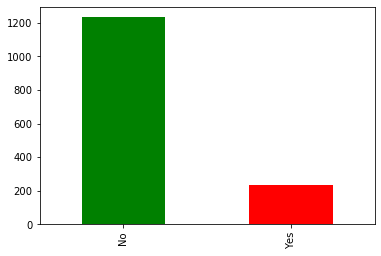

In [4]:
# In this exercise, we want to predict attrition, this is our label. The dataset is skewed and we will fix have to fix it
df.Attrition.value_counts().plot(kind="bar", color=["green", "red"]);

In [5]:
# Another view at our dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


(array([0, 1]), <a list of 2 Text xticklabel objects>)

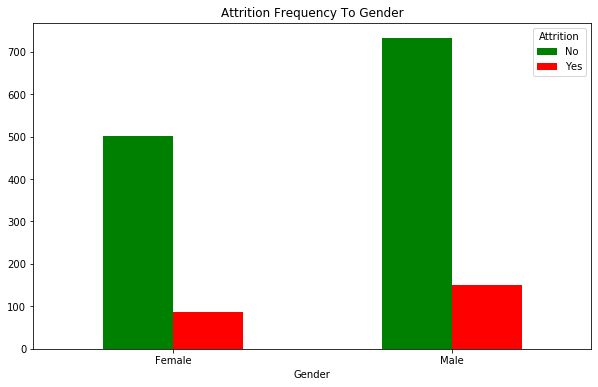

In [6]:
# Is there a corelation between attrition frequency and gender?
pd.crosstab(df.Gender, df.Attrition).plot(kind="bar", figsize=(10,6), color=["green", "red"])
plt.title("Attrition Frequency To Gender")
plt.xticks(rotation=0)

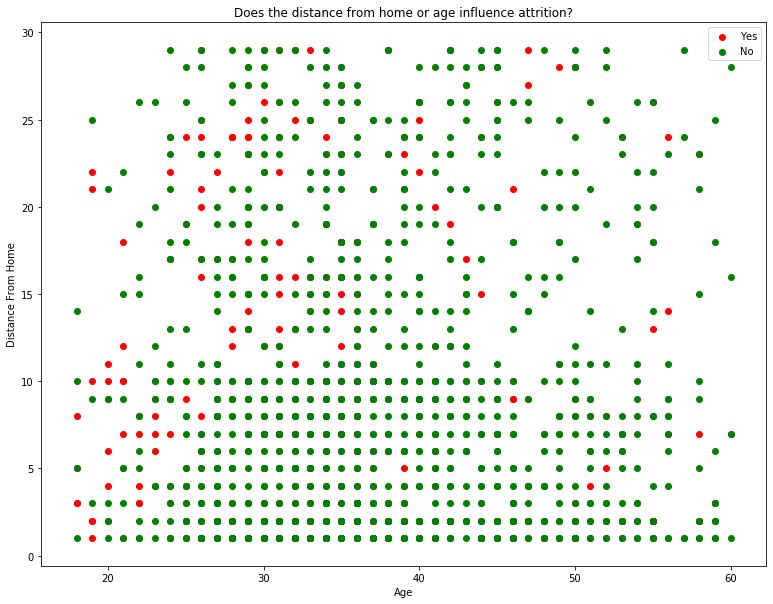

In [7]:
# Does the distance from home combined with age influence attrition?
plt.figure(figsize=(13,10))

plt.scatter(df.Age[df.Attrition=="Yes"], 
            df.DistanceFromHome[df.Attrition=="Yes"], 
            c="red")

plt.scatter(df.Age[df.Attrition=="No"], 
            df.DistanceFromHome[df.Attrition=="No"], 
            c="green")

plt.title("Does the distance from home or age influence attrition?")
plt.xlabel("Age")
plt.legend(["Yes","No"])
plt.ylabel("Distance From Home");

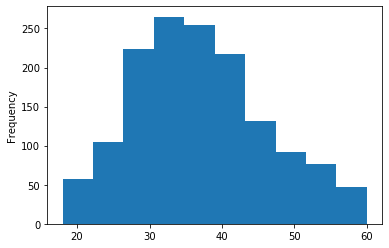

In [8]:
# What is the age distribution of employees? 
df.Age.plot.hist();

In [9]:
# If there are columns that have only one unique values, let's remove them
df.nunique().sort_values(ascending=True)

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [10]:
df=df.drop(columns=['Over18', 'StandardHours','EmployeeCount','EmployeeNumber'])

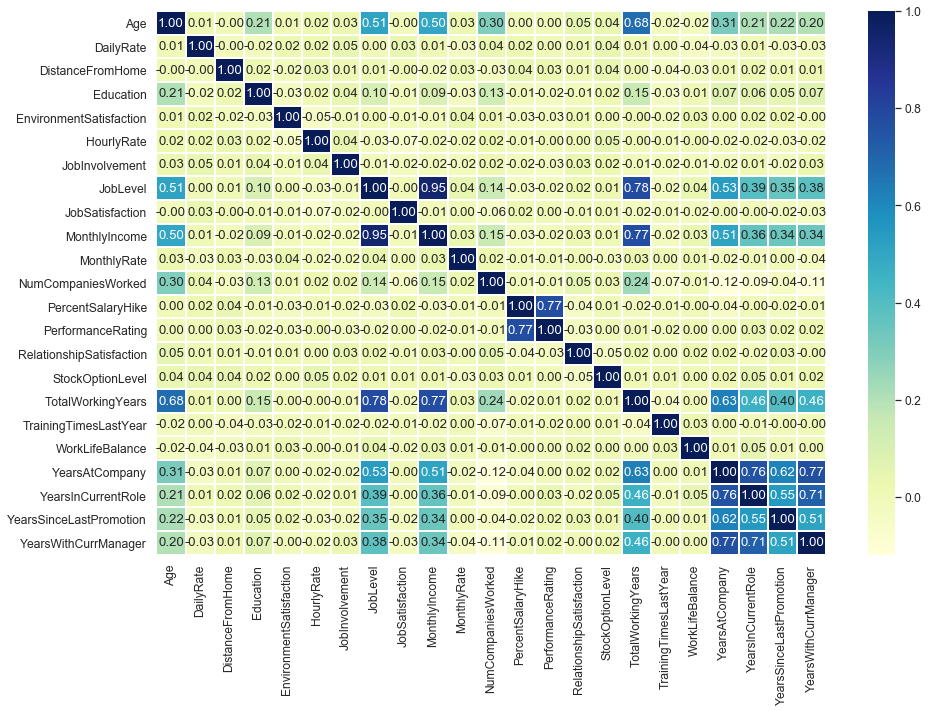

In [12]:
# Let's create the matrix to see what are the correlations between features
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=1, 
            fmt= ".2f", 
            cmap="YlGnBu");

In [13]:
# What columns have string data type instead of numerical?
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Attrition
BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [14]:
# This will turn all of the string value into category values
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [15]:
# Let's change the data type to numerical
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        
        df[label] = pd.Categorical(content).codes

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [16]:
# We need to fix this skew
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [17]:
# In order to do fix imbalanced distribution of labels, we will oversample this dataset
X = df.drop("Attrition",axis=1)
y = df["Attrition"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

train_data = pd.concat([X_train, y_train], axis=1)

negative = train_data[train_data.Attrition==0]
positive = train_data[train_data.Attrition==1]

pos_upsampled = resample(positive,
 replace=True,
 n_samples=len(negative))

upsampled = pd.concat([negative, pos_upsampled])

upsampled.Attrition.value_counts()

1    981
0    981
Name: Attrition, dtype: int64

In [18]:
upsampled.shape

(1962, 31)

# <center> Train And Test The Model</center>

Once we have balanced the dataset and have a decent knowledge about all the features and the size of this exercise, we can start to train the model with the train data and after that, evaluate how accurate it is, based on the test data.

In order to do so, we are splitting the dataset into train (80% of the dataset) and test (20% of the dataset). X are all the features (columns) that are assigned to the employees and y is the label that we want to predict (attrition).

In [19]:
# These are the features in the dataset, based on which the model will predict attrition
X = upsampled.drop("Attrition",axis=1)
y = upsampled["Attrition"]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
877,46,2,150,1,2,4,5,4,1,60,...,3,3,1,12,3,2,6,3,1,4
888,35,0,1212,2,8,2,2,3,0,78,...,3,2,1,16,6,2,13,2,4,12
166,41,2,465,1,14,3,1,1,1,56,...,3,1,1,13,2,3,9,8,1,8
116,34,2,1354,1,5,3,3,3,0,45,...,3,4,0,14,6,3,11,10,5,8
1081,35,2,1029,1,16,3,1,4,0,91,...,3,4,0,11,3,1,11,8,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,36,2,660,1,15,3,4,1,1,81,...,3,2,1,9,3,2,1,0,0,0
1111,53,2,607,1,2,5,5,3,0,78,...,3,2,1,34,4,3,33,7,1,9
422,19,2,489,0,2,2,5,1,1,52,...,3,3,0,1,3,4,1,0,0,0
288,26,2,1449,1,16,4,3,1,1,45,...,3,4,1,5,2,3,3,2,0,2


In [20]:
# We will compare these two models and pick the one that is more accurate
models = {"Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):

    # Make a list to keep model scores
    model_scores = {}

    # Loop through models
    for name, model in models.items():
    
    # Fit the model to the data
        model.fit(X_train, y_train)
    
    # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\mxr0520\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.6793893129770993,
 'Random Forest': 0.9745547073791349}

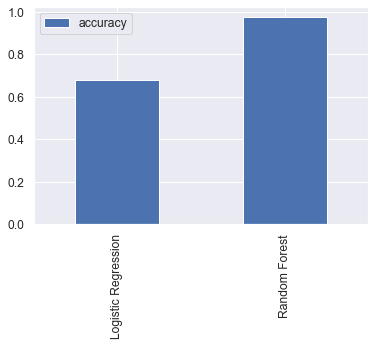

In [22]:
# Which model has the highest accuracy?
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

In [23]:
#Let's see if we can tune these models by adjusting the hyperparameters with RandomizedSearchCV

# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [24]:
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=30,
                                verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

C:\Users\mxr0520\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 20 is smaller than n_iter=30. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


In [25]:
# let's see what are the best parameters for logistic regression
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [26]:
# What is the accuracy with best parameters for logistic regression?
rs_log_reg.score(X_test, y_test)

0.7659033078880407

In [27]:
# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


In [28]:
# let's see what are the best parameters for random forrest classifier
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': None}

In [29]:
# What is the accuracy with best parameters for random forrest classifier?
rs_rf.score(X_test, y_test)

0.9033078880407125

In [30]:
# Let's predict our labels (attrition)
y_preds = rs_rf.predict(X_test)

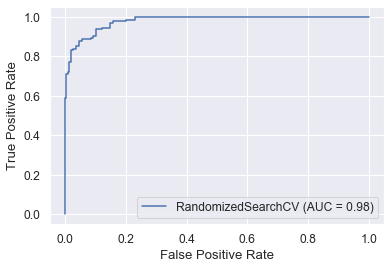

In [31]:
# Plot ROC curve and calculate AUC metric that will show the accuracy
plot_roc_curve(rs_rf, X_test, y_test);

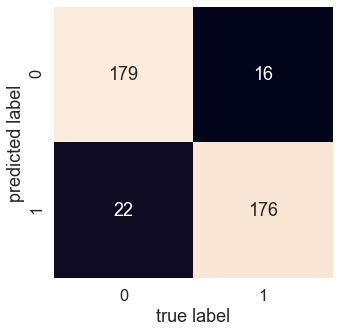

In [32]:
# Let's create the confusion matrix and see how accurate the model is
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):

    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False,
                     fmt=".0f")
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [33]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       195
           1       0.92      0.89      0.90       198

    accuracy                           0.90       393
   macro avg       0.90      0.90      0.90       393
weighted avg       0.90      0.90      0.90       393



In [34]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': None}

In [35]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with RandomizedSearchCV)
clf = RandomForestClassifier(n_estimators = 460,
                             min_samples_split = 2,
                             min_samples_leaf = 5,
                             max_depth = None)

In [36]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.94910941, 0.91857506, 0.94387755, 0.93112245, 0.95153061])

In [37]:
cv_acc = np.mean(cv_acc)
cv_acc

0.9388430181232799

In [38]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.9231043453916177

In [39]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9551590179218896

In [40]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.940558837325795

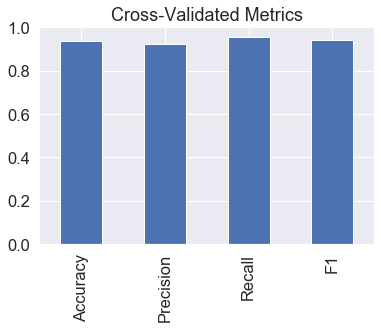

In [41]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

In [42]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=460,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [44]:
feature_importances

,importance
MonthlyIncome,0.091044
OverTime,0.069675
Age,0.057131
TotalWorkingYears,0.055894
StockOptionLevel,0.050901
DistanceFromHome,0.050803
YearsAtCompany,0.043058
DailyRate,0.040837
MonthlyRate,0.039117
JobRole,0.037835


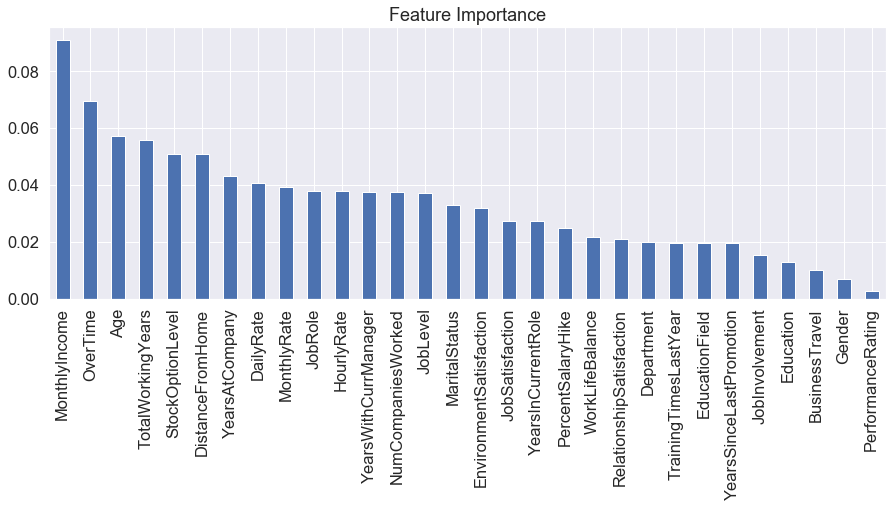

In [45]:
feature_importances.plot.bar(figsize =(15,5), title="Feature Importance", legend=False)